<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Автор: [Yury Kashnitsky](https://yorko.github.io). Все материалы распространяются под [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).

# Задание #2

## Исследовательский анализ данных (EDA) авиарейсов США с помощью Pandas, Matplotlib и Seaborn

<img src='https://habrastorage.org/webt/z9/io/wb/z9iowbwlya0sadrr0rf_am0ffm0.jpeg' width=50%>

### Ваша задача состоит в том, чтобы:
 1. написать код и выполнить вычисления в ячейках ниже;
 2. выбрать ответы в [веб-форме](https://docs.google.com/forms/d/1GXgR4TsqoTH_nQkrgluqWBElpK0emfhNzdZWZQObtnw).

*Если вы уверены, что в задании/решении что-то не на 100% верно, пожалуйста, оставьте свой отзыв через указанную веб-форму ↑*.
    
-----

In [1]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns
sns.set()

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import gdown

if not os.path.exists("../data/flights_2008.csv.bz2"):
    gdown.download(id="1kOEcWtcTbbrlhVf1wlYtFQUF_kY92U5O", output="../data/flights_2008.csv.bz2")

Downloading...
From (uriginal): https://drive.google.com/uc?id=1kOEcWtcTbbrlhVf1wlYtFQUF_kY92U5O
From (redirected): https://drive.google.com/uc?id=1kOEcWtcTbbrlhVf1wlYtFQUF_kY92U5O&confirm=t&uuid=b3acccf1-51ba-4951-8ffb-fcad9ad1a890
To: /home/m-melgizin/repos/mlcourse.ai-solution/data/flights_2008.csv.bz2
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114M/114M [00:26<00:00, 4.25MB/s]


* Набор данных содержит информацию о перевозчиках и рейсах между аэропортами США за 2008 год. 
* Описание столбцов доступно [здесь](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). Посетите этот сайт, чтобы узнать значение кодов отмены рейсов.

Рассмотрим следующие используемые нами термины:
* уникальный рейс - запись (строка) в наборе данных
* завершенный рейс - рейс, который не отменен (`Cancelled==0` в наборе данных)
* код рейса - комбинация `['UniqueCarrier','FlightNum']`, т.е. UA52
* код аэропорта - трехбуквенный псевдоним аэропорта из столбцов `'Origin'` или `'Dest'`.

**Считывание данных в память и создание объекта Pandas ``DataFrame``**.

Мы не собираемся считывать весь набор данных. Для уменьшения занимаемой памяти мы загрузим только необходимые столбцы и приведем их к подходящим типам данных.

In [3]:
dtype = {
    "DayOfWeek": np.uint8,
    "DayofMonth": np.uint8,
    "Month": np.uint8,
    "Cancelled": np.uint8,
    "Year": np.uint16,
    "FlightNum": np.uint16,
    "Distance": np.uint16,
    "UniqueCarrier": str,
    "CancellationCode": str,
    "Origin": str,
    "Dest": str,
    "ArrDelay": np.float16,
    "DepDelay": np.float16,
    "CarrierDelay": np.float16,
    "WeatherDelay": np.float16,
    "NASDelay": np.float16,
    "SecurityDelay": np.float16,
    "LateAircraftDelay": np.float16,
    "DepTime": np.float16,
}

In [4]:
%%time
flights_df = pd.read_csv("../data/flights_2008.csv.bz2", usecols=dtype.keys(), dtype=dtype)

CPU times: user 18.3 s, sys: 321 ms, total: 18.7 s
Wall time: 18.7 s


**Проверка количества строк и столбцов, и печать названий столбцов.**

In [5]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Печать первых 5 строк набора данных.**

In [6]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Транспонируем фрейм, чтобы увидеть все элементы сразу.**

In [7]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003.0,754.0,628.0,926.0,1829.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14.0,2.0,14.0,-6.0,34.0
DepDelay,8.0,19.0,8.0,-4.0,34.0
Origin,IAD,IAD,IND,IND,IND


**Исследуем типы данных всех признаков и общий размер датафрейма в памяти.**

In [8]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float16
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float16
 8   DepDelay           float16
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float16
 15  WeatherDelay       float16
 16  NASDelay           float16
 17  SecurityDelay      float16
 18  LateAircraftDelay  float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Получение базовой статистики по каждому признаку.**

In [9]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Считаем уникальных перевозчиков и строим график их относительной доли рейсов:**

In [10]:
flights_df["UniqueCarrier"].nunique()

20

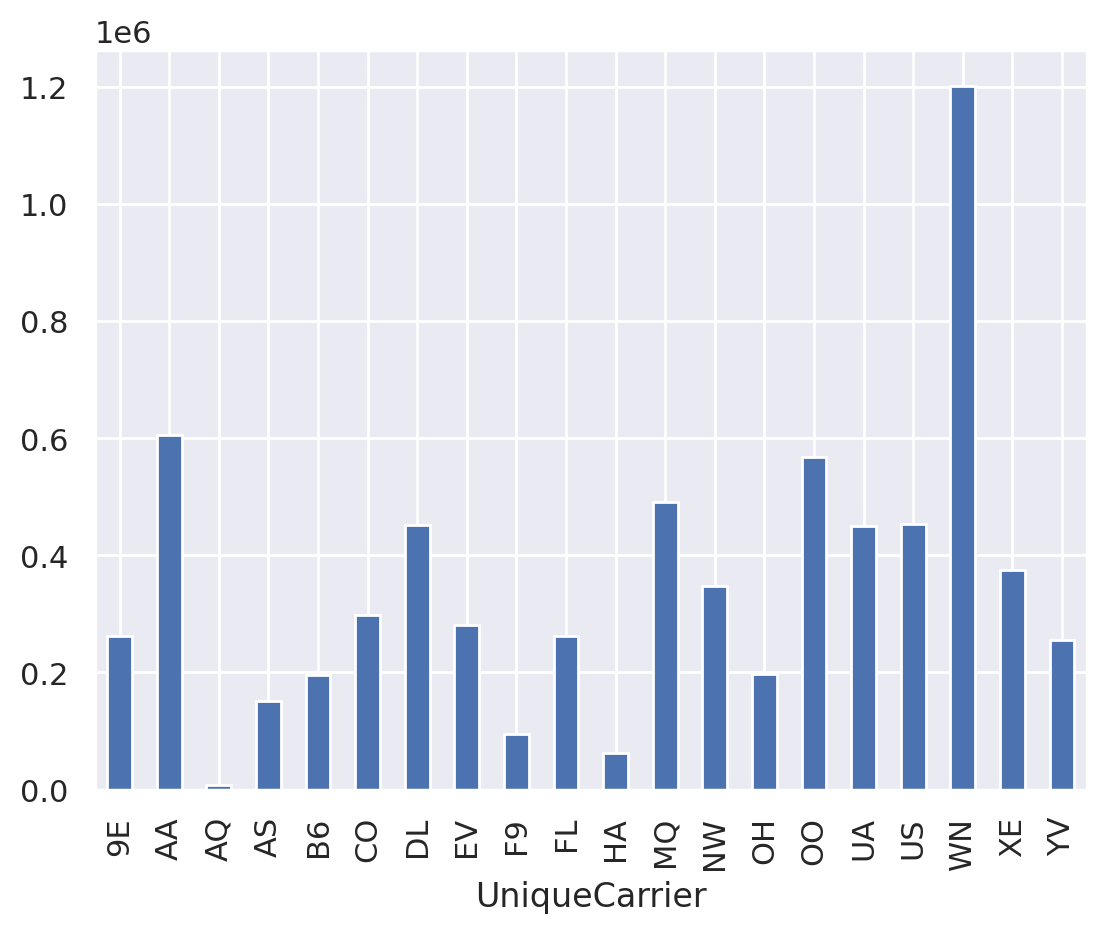

In [11]:
flights_df.groupby("UniqueCarrier").size().plot(kind="bar");

**Мы также можем производить _группировку по_ (_groupby_) категории/категориям для вычисления различных агрегированных статистик.**

**Например, найти топ-3 кодов рейсов, которые имеют наибольшее общее пройденное расстояние в 2008 году.**

In [12]:
flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(
    ascending=False
).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244
               14           1796244
UA             52           1789722
Name: Distance, dtype: uint64

**Другой способ:**

In [13]:
flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg(
    {"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
).sort_values(("Distance", "sum"), ascending=False).iloc[0:3]

Distance                Cancelled
                                mean      sum count       sum
UniqueCarrier FlightNum                                      
CO            15         4962.000000  1796244   362         0
              14         4962.000000  1796244   362         0
UA            52         2465.181818  1789722   726         8

**Количество рейсов по дням недели и месяцам:**

In [14]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Удобно также раскрашивать такие таблицы, чтобы легко заметить провалы:**

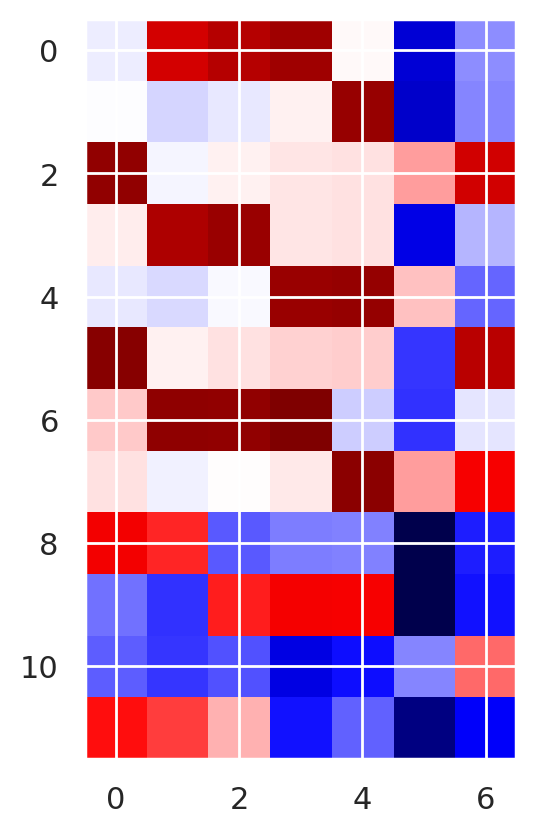

In [15]:
plt.imshow(
    pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
    cmap="seismic",
    interpolation="none",
);

**Гистограмма дальности полета:**

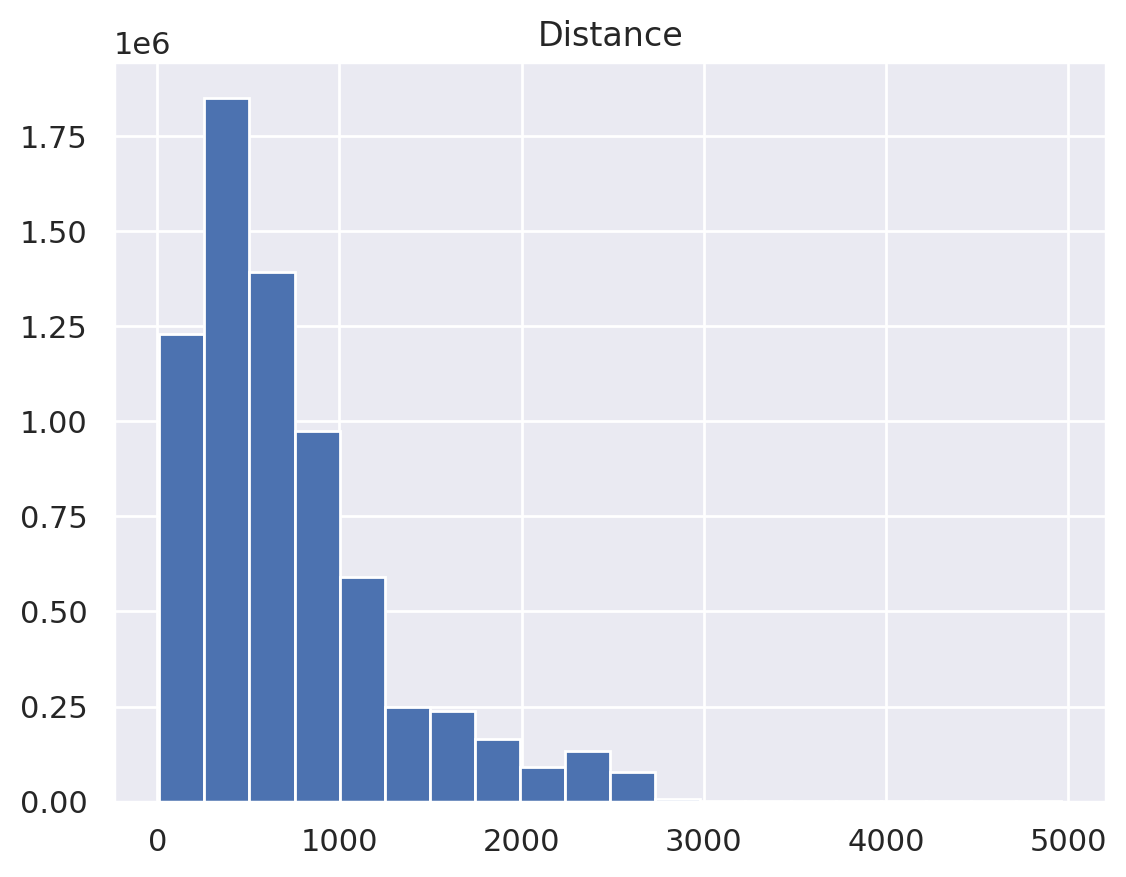

In [16]:
flights_df.hist("Distance", bins=20);

**Построение гистограммы частоты полетов по датам.**

In [17]:
flights_df["Date"] = pd.to_datetime(
    flights_df.rename(columns={"DayofMonth": "Day"})[["Year", "Month", "Day"]]
)

In [18]:
num_flights_by_date = flights_df.groupby("Date").size()

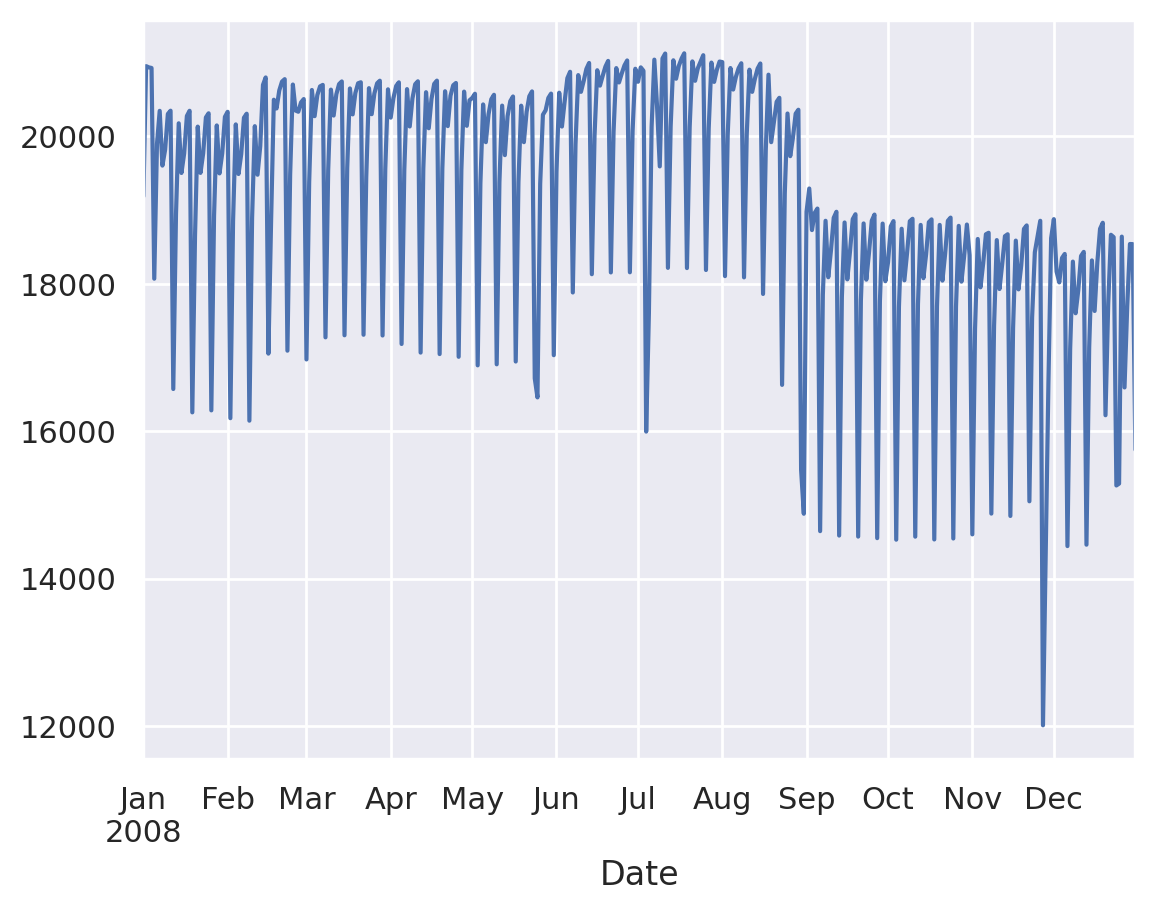

In [19]:
num_flights_by_date.plot();

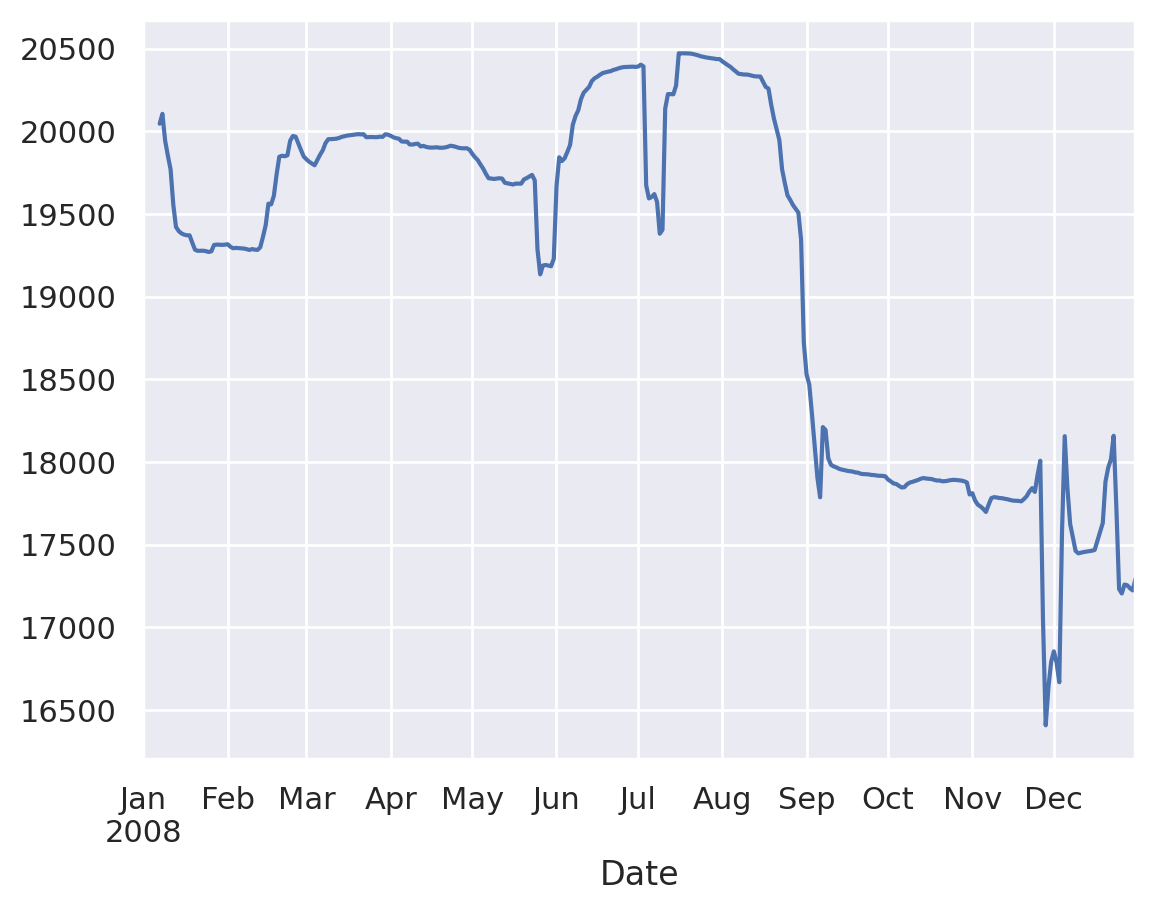

In [20]:
num_flights_by_date.rolling(window=7).mean().plot();

**Нам понадобится новый столбец в нашем наборе данных - час вылета.**

Как видим, `DepTime` распределено от 1 до 2400 (оно задается в формате `hhmm`, посмотрите еще раз [описание столбца](https://www.transtats.bts.gov/Fields.asp?Table_ID=236)). Будем считать час вылета как `DepTime` // 100 (делить на 100 и применять функцию `floor`). Однако теперь у нас будет и час 0, и час 24. Час 24 звучит странно, зададим ему значение 0 (типичное несовершенство реальных данных, однако можно проверить, что оно затрагивает всего 521 строку, что вроде как не страшно). Таким образом, теперь значения нового столбца `DepHour` будут распределены от 0 до 23. Есть несколько пропущенных значений, пока что мы не будем их заполнять, а просто проигнорируем.

In [21]:
flights_df["DepHour"] = flights_df["DepTime"] // 100
flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)

In [22]:
flights_df["DepHour"].describe()

count    6873482.0
mean           NaN
std            0.0
min            0.0
25%            9.0
50%           13.0
75%           17.0
max           23.0
Name: DepHour, dtype: float64

### Вопросы

**1. Сколько уникальных авиаперевозчиков в нашем наборе данных?**

- 10
- 15
- 20
- 25 

In [23]:
flights_df["UniqueCarrier"].nunique() # Answer: 3

20

**2. Мы имеем в наборе данных как отмененные, так и завершенные рейсы. Проверьте, каких рейсов больше - завершенных или отмененных. Какова разница?**

- Отмененных больше завершенных на 329 рейсов
- Завершенных больше отмененных на 6734860 рейсов
- Отмененных больше завершенных на 671 рейсов
- Завершенных больше отмененных на 11088967 рейсов

In [24]:
_df = flights_df.groupby("Cancelled").size()
_df

Cancelled
0    6872294
1     137434
dtype: int64

In [25]:
_df[0] - _df[1] # Answer: 2

6734860

**3. Найдите рейс с наибольшей задержкой вылета и рейс с наибольшей задержкой прилета. Имеют ли они один и тот же аэропорт назначения, и если да, то каков его код?**

- да, ATL
- да, HNL
- да, MSP
- нет

In [26]:
print(flights_df[flights_df["DepDelay"] == flights_df["DepDelay"].max()]["Dest"])
print(flights_df[flights_df["ArrDelay"] == flights_df["ArrDelay"].max()]["Dest"]) # Answer: 3

2235378    MSP
Name: Dest, dtype: object
1018798    MSP
Name: Dest, dtype: object


**4. Find the carrier that has the greatest number of cancelled flights.**

- AA
- MQ
- WN
- CO 

In [27]:
flights_df[flights_df["Cancelled"] == 1]["UniqueCarrier"].mode() # Answer: 2

0    MQ
Name: UniqueCarrier, dtype: object

**5. Рассмотрим время вылета и рассмотрим распределение по часам (столбец `DepHour`, который мы создали ранее). В какой час наибольший процент вылетов?**

*Подсказка:* Проверьте формат времени [здесь](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 5 am  
- 8 am
- 3 pm 

In [28]:
(flights_df["DepHour"].value_counts(normalize=True) * 100.).sort_values(ascending=False).head(1) # Answer: 3

8.0    6.53561
Name: DepHour, dtype: float64

**6. Хорошо, теперь рассмотрим распределение отмененных рейсов по времени. В какой час процент отмененных рейсов наименьший?**

- 2 am 
- 9 pm  
- 8 am  
- 3 am

In [29]:
flights_df.groupby("DepHour")["Cancelled"].mean().sort_values().head(1) # Answer: 4

DepHour
3.0    0.0
Name: Cancelled, dtype: float64

**7. Есть ли час, в котором вообще не было отмененных рейсов? Отметьте все, что применимо**

- 3
- 19
- 22
- 4 

In [30]:
set(range(24)).difference(
    flights_df[flights_df["Cancelled"] == 1]["DepHour"].unique()
) # Answer: 1

{3}

**8. Найдите самый загруженный час, или, другими словами, час, когда количество вылетевших рейсов достигает максимума**.

*Подсказка*: рассматриваются только *завершенные* рейсы.

- 4
- 7
- 8
- 17 

In [31]:
flights_df[flights_df["Cancelled"] == 0].groupby("DepHour").size().idxmax() # Answer: 3

8.0

**9. Поскольку нам известен час вылета, было бы интересно изучить среднюю задержку для соответствующего часа. Есть ли случаи, когда самолеты в среднем вылетали раньше, чем должны были? И если да, то в какие часы вылета это происходило?**

*Подсказка:* Рассматриваются только *завершенные* полеты.

- нет, таких случаев нет
- да, в 5-6 am 
- да, в 9-10 am
- да, в 2-4 pm

In [32]:
flights_df[flights_df["Cancelled"] == 0].groupby("DepHour")["DepDelay"].mean() # Answer: 2

DepHour
0.0      70.735130
1.0     111.783852
2.0     122.591354
3.0      95.819931
4.0       3.374742
5.0      -4.255584
6.0      -1.629400
7.0       0.102522
8.0       1.760612
9.0       3.753258
10.0      5.462338
11.0      6.681922
12.0      7.902812
13.0      8.811804
14.0     10.351616
15.0     11.878466
16.0     11.883778
17.0     13.212060
18.0     15.340142
19.0     16.877960
20.0     22.784990
21.0     23.030813
22.0     38.038555
23.0     60.012043
Name: DepDelay, dtype: float32

**10. Учитывая только выполненные перевозчиком рейсы, которые Вы нашли в вопросе 4, найдите распределение этих рейсов по часам. В какое время вылетает наибольшее количество самолетов?**

- в полдень
- в 7 am
- в 8 am
- в 10 am

In [33]:
flights_df.query('(Cancelled == 0) & (UniqueCarrier == "MQ")').groupby("DepHour").size().idxmax() # Answer: 4

10.0

**11. Найдите топ-10 перевозчиков по количеству *выполненных* рейсов (столбец _UniqueCarrier_)?**

**Кто из перечисленных ниже перевозчиков _не_ входит в Ваш список 10 лучших?**

- DL
- AA
- OO
- EV

In [34]:
flights_df.loc[flights_df["Cancelled"] == 0, "UniqueCarrier"].value_counts().head(10) # Answer: 4

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: UniqueCarrier, dtype: int64

**12. Построить распределения причин отмены рейсов (CancellationCode)**.

**Какова наиболее частая причина отмены рейса? (Используйте эту [ссылку](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) для перевода кодов в причины)**.
- Carrier
- Weather conditions
- National Air System
- Security reasons

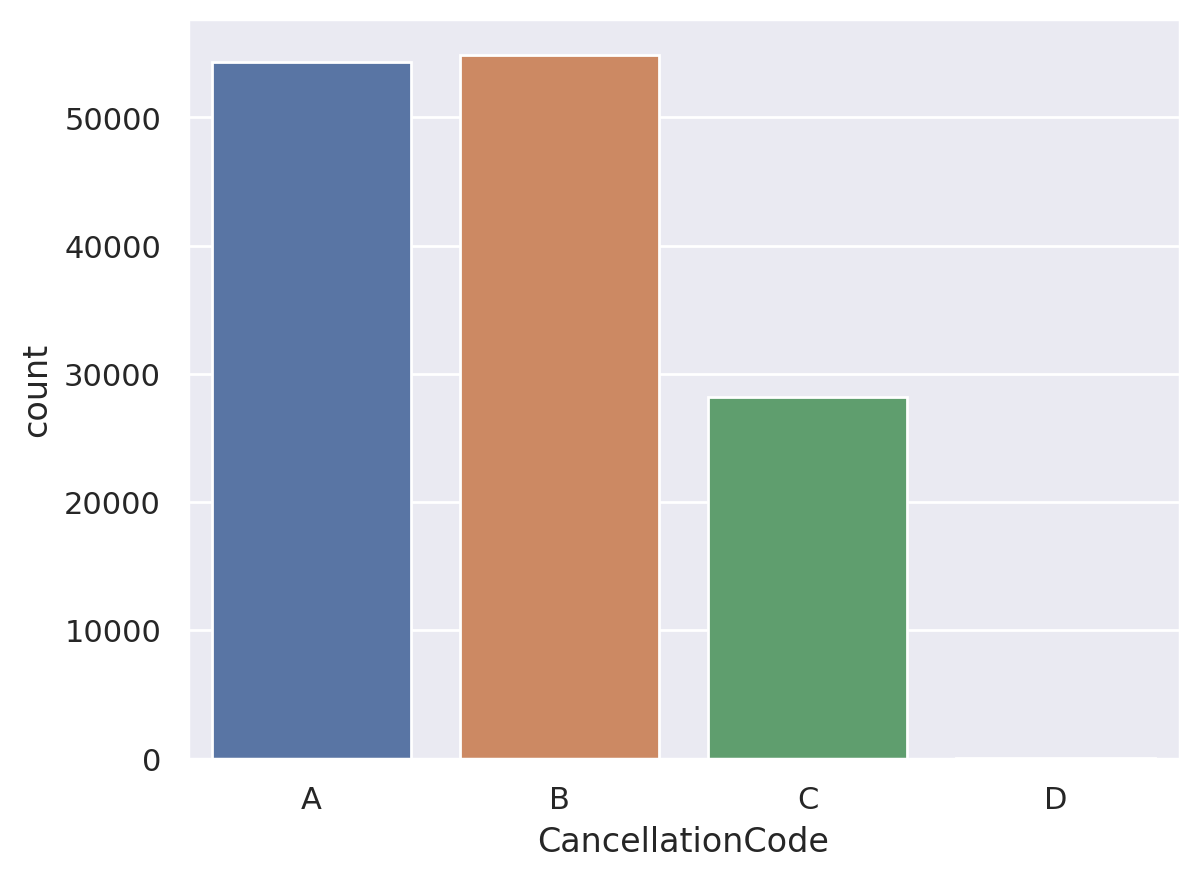

In [35]:
sns.countplot(x=flights_df["CancellationCode"].sort_values());

In [36]:
flights_df["CancellationCode"].mode()

0    B
Name: CancellationCode, dtype: object

```
A - Carrier 
B - Weather 
C - National Air System 
D - Security
```

Ответ: 2

**13. Какой маршрут является наиболее частым по количеству рейсов?**

(Рассмотрите признаки _'Origin'_ и _'Dest'_. Рассматривайте направления _A->B_ и _B->A_ как _разные_ маршруты) 

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (SFO-LAX)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [37]:
flights_df["Route"] = flights_df["Origin"] + "->" + flights_df["Dest"]
flights_df["Route"].value_counts().head(1) # Answer: 2

SFO->LAX    13788
Name: Route, dtype: int64

In [38]:
# without creating new pd.Series
origin, dest = flights_df.groupby(["Origin", "Dest"]).size().idxmax()
print(f"{origin}->{dest}") # Answer: 2

SFO->LAX


**14. Найти 5 маршрутов с наибольшими задержками (подсчитать, сколько раз они задерживались при вылете). Из всех рейсов по этим пяти маршрутам подсчитать все рейсы, у которых погодные условия способствовали задержке.**

_Подсказка_: учитывайте только положительные задержки.

- 449 
- 539 
- 549 
- 668

In [39]:
delayed_top5 = (
    flights_df[flights_df["DepDelay"] > 0.]
    .groupby("Route")
    .size()
    .sort_values(ascending=False)
    .head(5)
)
print(delayed_top5)

filtered_df = flights_df[flights_df["Route"].isin(delayed_top5.index)]
(filtered_df["WeatherDelay"] > 0).sum() # Answer: 4

Route
LAX->SFO    6253
DAL->HOU    5742
SFO->LAX    5322
ORD->LGA    5311
HOU->DAL    5288
dtype: int64


668

**15. Исследовать почасовое распределение времени отправления. Выберите все верные утверждения:**

 - Рейсы нормально распределены в интервале времени [0-23] (Искать: нормальное распределение, колоколообразная кривая).
 - Рейсы равномерно распределены в интервале времени [0-23].
 - В период с 0 до 4 часов утра вылетов значительно меньше, чем в период с 7 до 8 часов вечера.

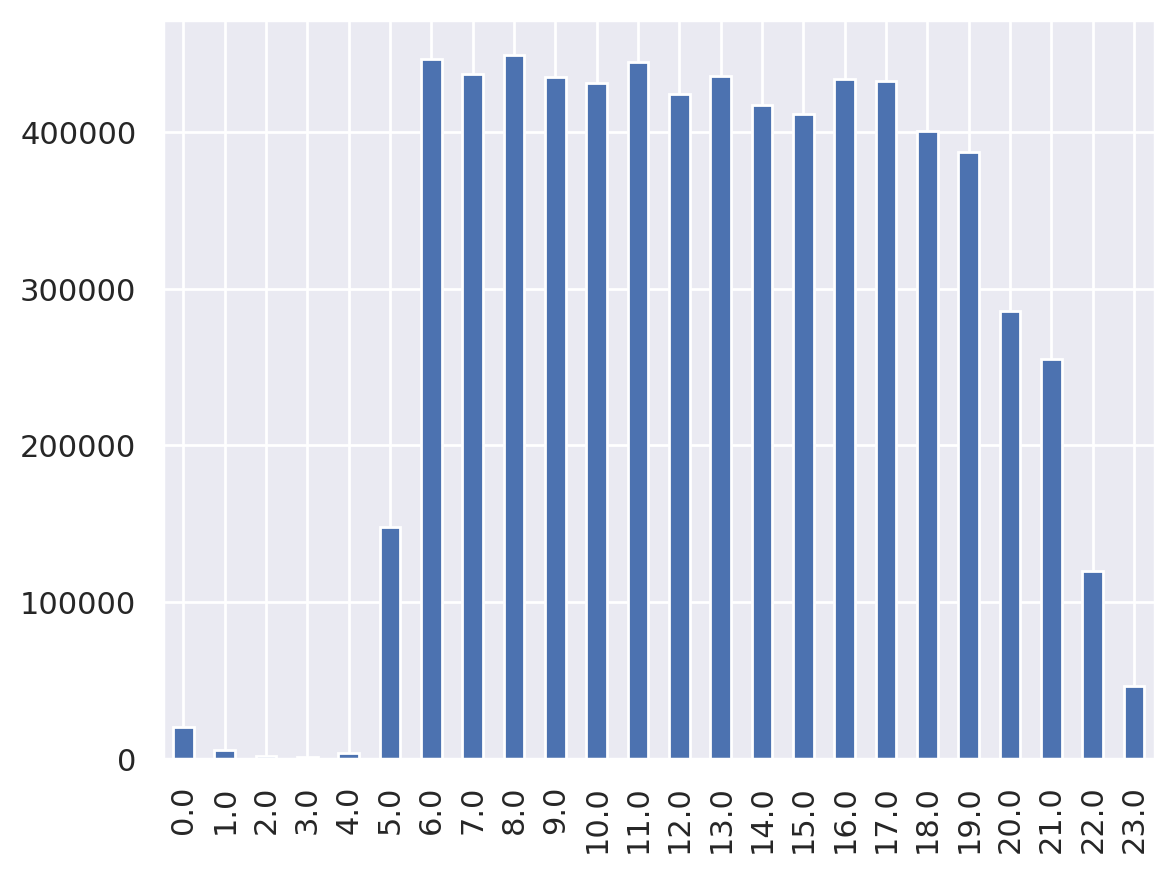

In [40]:
flights_df["DepHour"].value_counts(sort=False).sort_index().plot(kind="bar");

In [41]:
print(
    ((flights_df["DepHour"] >= 19) & (flights_df["DepHour"] <= 20)).sum() / \
    ((flights_df["DepHour"] >= 0) & (flights_df["DepHour"] <= 4)).sum()
) # Answer: 3

20.842615236974893


**16. Покажите, как изменяется количество рейсов во времени (на ежедневной/недельной/месячной основе), и интерпретируйте полученные результаты.**

**Выберите все верные утверждения:**
- Количество рейсов в выходные дни меньше, чем в будни (рабочие дни). 
- Наименьшее количество рейсов приходится на воскресенье.
- Зимой количество рейсов меньше, чем летом.

_Подсказка_: Найдите официальные метеорологические зимние месяцы для Северного полушария.

DayOfWeek
1    1015688
2    1008881
3    1019463
4    1014340
5    1011204
6     843969
7     958749
dtype: int64


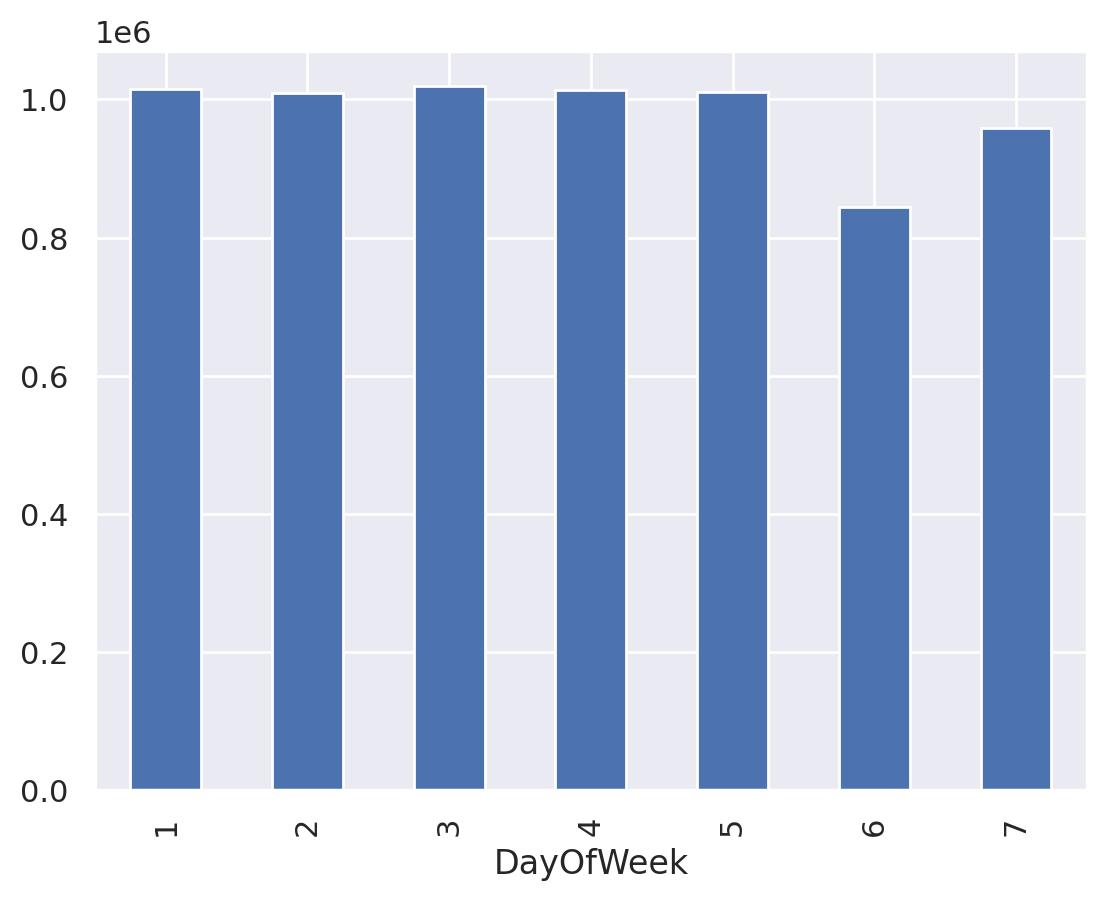

In [42]:
flights_by_day_of_week = (
    flights_df[flights_df["Cancelled"] == 0].groupby("DayOfWeek").size()
)

print(flights_by_day_of_week.head(7))

flights_by_day_of_week.plot(kind="bar");

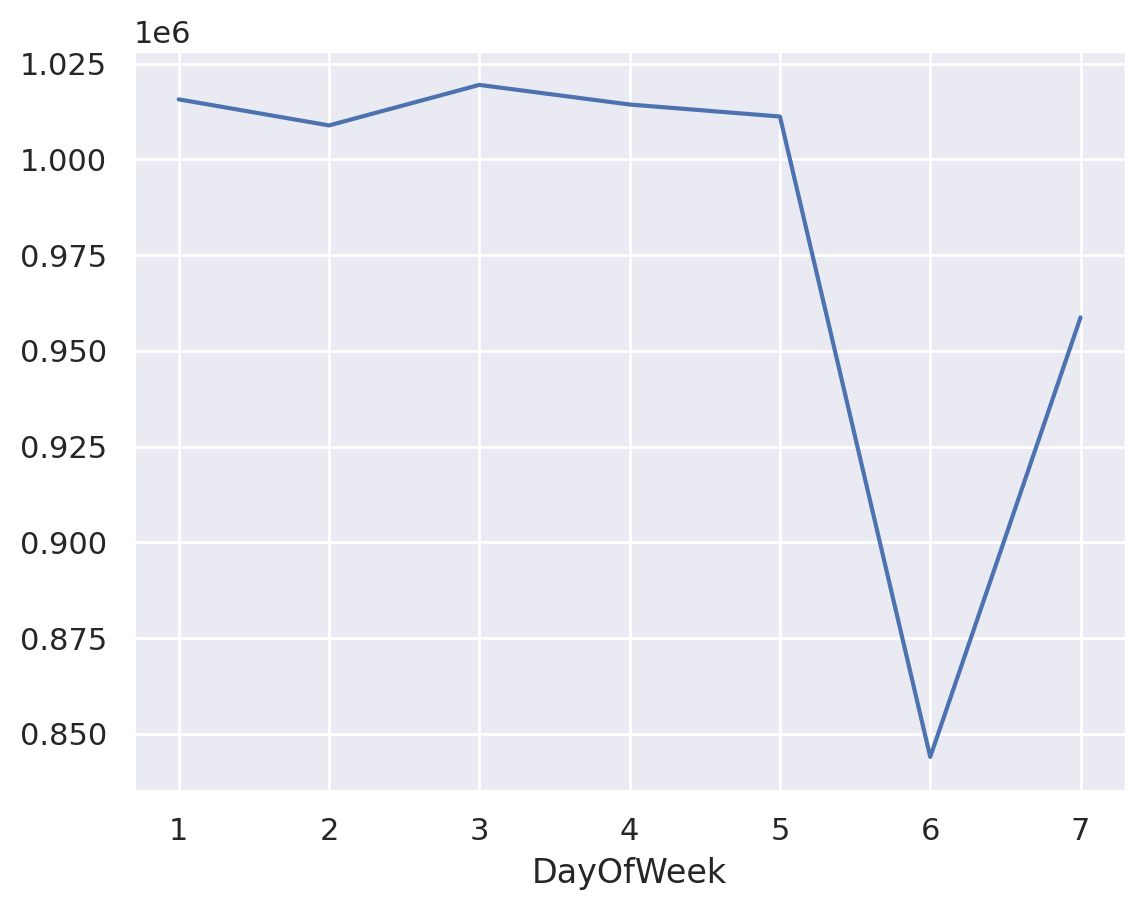

In [43]:
flights_by_day_of_week.plot();
# Statement 1: True
# Statement 2: False 

Winter: 1634450
Summer: 1817511


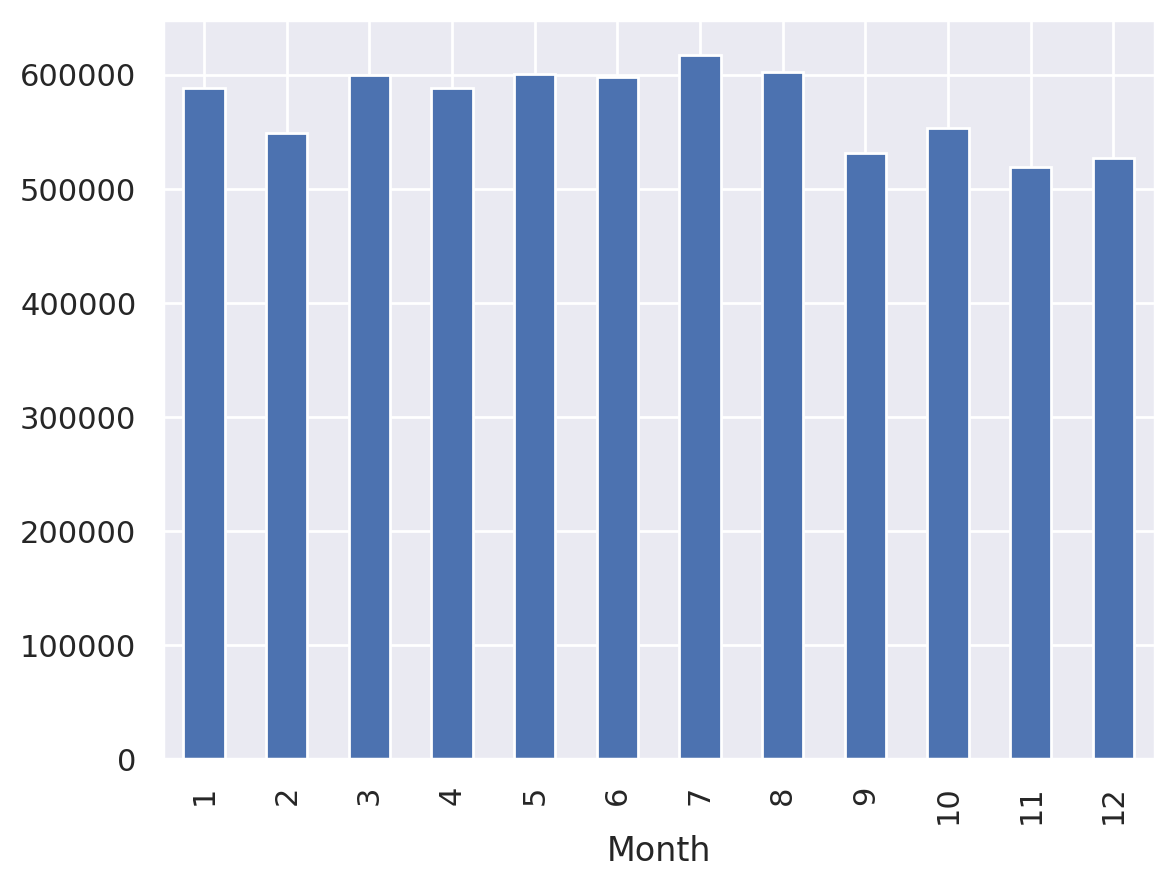

In [44]:
flights_by_month = flights_df[flights_df["Cancelled"] == 0].groupby("Month").size()
print(f"Winter: {flights_by_month.loc[[1] + [11, 12]].sum()}\nSummer: {flights_by_month.loc[[6, 7, 8]].sum()}")
flights_by_month.plot(kind="bar");
# Statement 3: True

**17. Исследовать распределение причин отмены с течением времени. Постройте гистограмму причин отмены, агрегированную по месяцам.**

**Выберите все верные утверждения:**
- Наименьшее количество отмен по причине погоды приходится на октябрь. 
- Наибольшее количество отмен в сентябре связано с причинами безопасности.
- В апреле самая высокая причина отмены рейсов - перевозчики. 
- Отмены рейсов по вине Национальной авиационной системы происходят чаще, чем по вине перевозчиков.

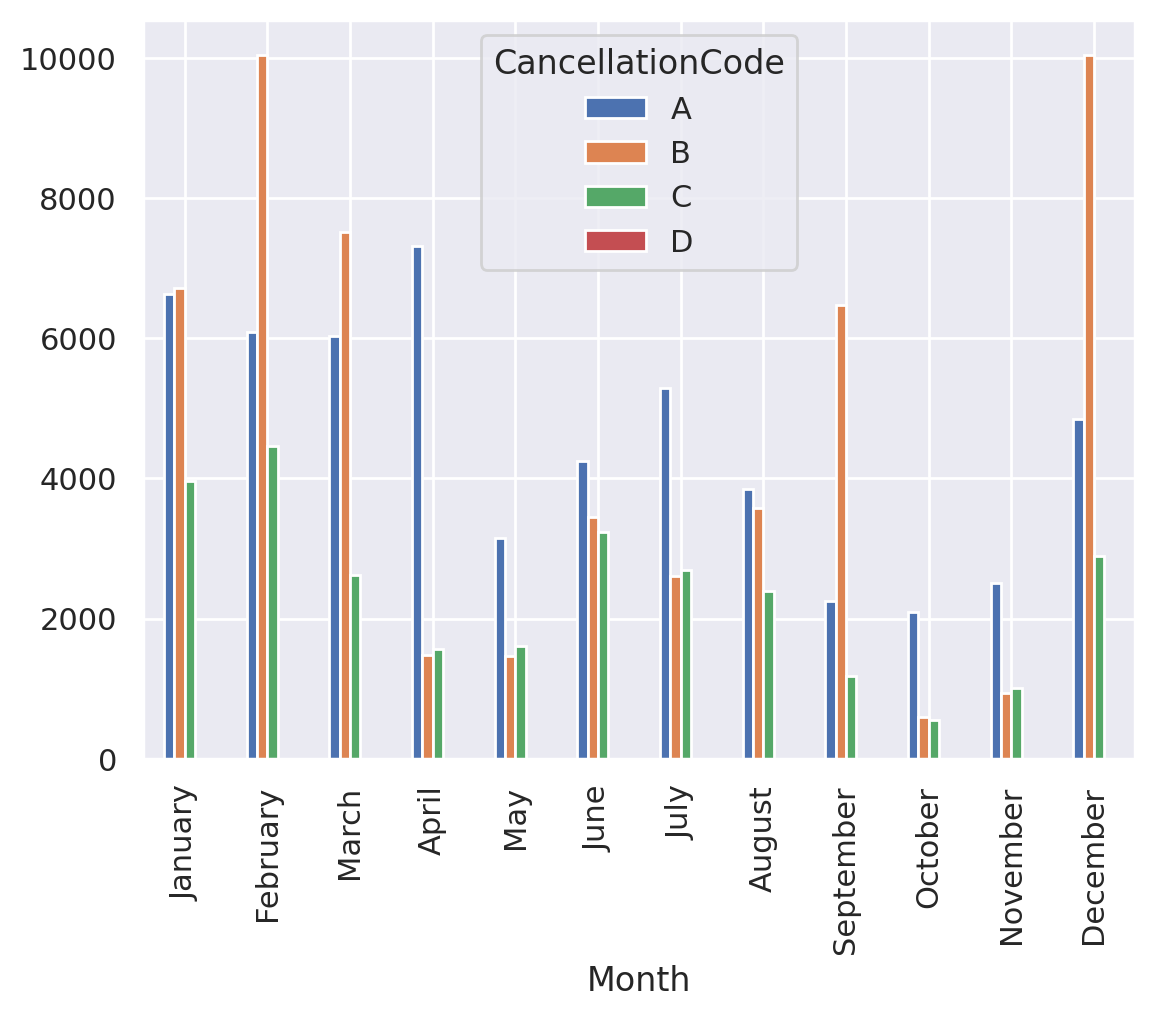

In [45]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax = flights_df.groupby(["Month", "CancellationCode"]).size().unstack().plot(kind="bar")
ax.set_xticklabels(month_names, rotation=90)
plt.show()

# Statement 1: True
# Statement 2: False
# Statement 3: True
# Statement 4: False

```
A - Carrier 
B - Weather 
C - National Air System 
D - Security
```

**18. В каком месяце наблюдается наибольшее количество отказов от услуг по причине Carrier?**
- May
- January
- September
- April

In [46]:
flights_df.loc[flights_df["CancellationCode"] == "A", "Month"].value_counts().head(1) # Answer: 4

4    7312
Name: Month, dtype: int64

**19. Укажите перевозчика с наибольшим числом отказов по вине перевозчика в соответствующем месяце из предыдущего вопроса.**

- 9E
- EV
- HA
- AA

In [47]:
flights_df.loc[
    (flights_df["CancellationCode"] == "A") & (flights_df["Month"] == 4),
    "UniqueCarrier",].value_counts().head(1) # Answer: 4

AA    3696
Name: UniqueCarrier, dtype: int64

**20. Проанализируйте медианные задержки прибытия и отправления (во времени) по перевозчикам. Какой перевозчик имеет наименьшее медианное время задержки как для прибытия, так и для отправления? Оставьте только неотрицательные значения времени задержки ('ArrDelay', 'DepDelay'). ([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) может быть полезен в этом упражнении, а также может быть хорошей идеей удалить промахи, чтобы построить красивые графики. Можно исключить значения времени задержки, превышающие соответствующий .95-й процентиль.)**

- EV
- OO
- AA
- AQ 

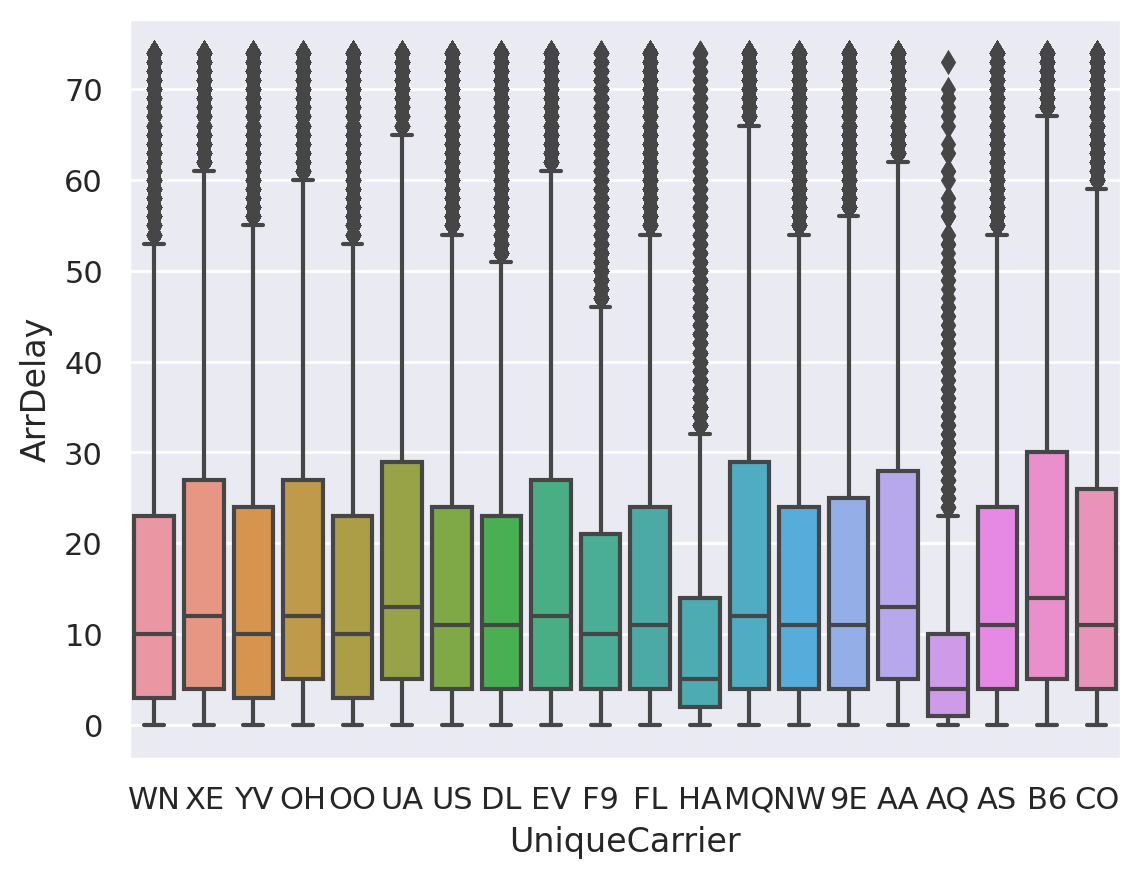

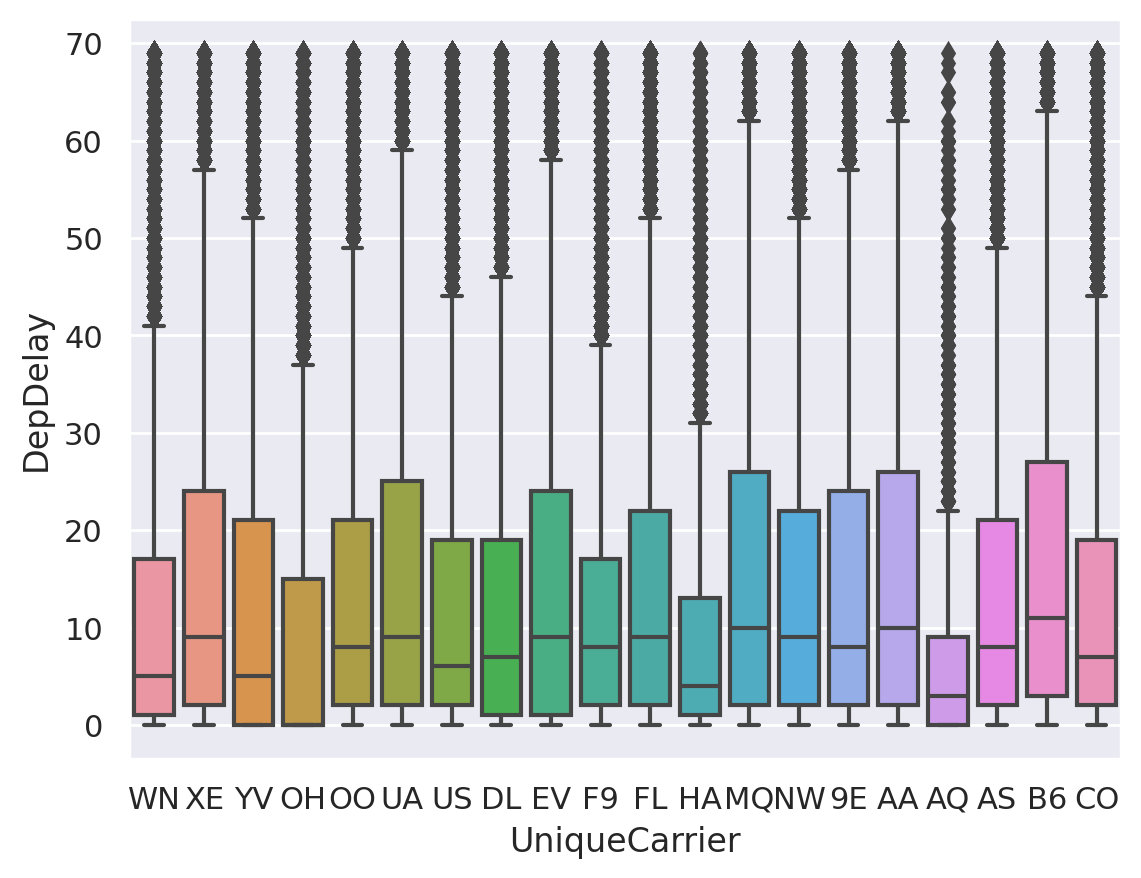

In [48]:
for delay_type in ["ArrDelay", "DepDelay"]:
    _df = flights_df[
        (flights_df[delay_type] >= 0)
        & (flights_df[delay_type] < flights_df[delay_type].quantile(.95))
    ]
    sns.boxplot(_df, x="UniqueCarrier", y=delay_type)
    plt.show()